# XOR Multiple Inputs/Targets

Testing...

In [1]:
import sys
sys.path.append("..")

In [2]:
from conx import Network, Layer, SGD

Using Theano backend.


In [3]:
net = Network("XOR2")
net.add(Layer("input1", shape=1))
net.add(Layer("input2", shape=1))
net.add(Layer("hidden1", shape=2, activation="sigmoid"))
net.add(Layer("hidden2", shape=2, activation="sigmoid"))
net.add(Layer("shared-hidden", shape=2, activation="sigmoid"))
net.add(Layer("output1", shape=1, activation="sigmoid"))
net.add(Layer("output2", shape=1, activation="sigmoid"))

net.connect("input1", "hidden1")
net.connect("input2", "hidden2")
net.connect("hidden1", "shared-hidden")
net.connect("hidden2", "shared-hidden")
net.connect("shared-hidden", "output1")
net.connect("shared-hidden", "output2")

net.set_input_layer_order("input1", "input2")
net.set_output_layer_order("output1", "output2")

In [4]:
net.compile(loss='mean_squared_error',
            optimizer=SGD(lr=0.3, momentum=0.9))

In [5]:
dataset = [
    ([[0],[0]], [[0],[0]]),
    ([[0],[1]], [[1],[1]]),
    ([[1],[0]], [[1],[1]]),
    ([[1],[1]], [[0],[0]])
]

net.set_dataset(dataset)

2 train inputs, 2 test inputs
Set 4 inputs and targets
Input data shapes: [(1,), (1,)], range: (0.0, 1.0), types: [dtype('float32'), dtype('float32')]
Target data shapes: [(1,), (1,)], range: (0.0, 1.0), types: [dtype('float32'), dtype('float32')]


<IPython.core.display.Javascript object>

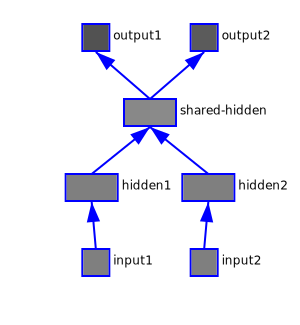

In [6]:
net

In [7]:
for i in range(20):
    (epoch_count, loss, acc, val_acc) = net.train(epochs=100, verbose=0)
    for index in range(4):
        net.propagate(dataset[index][0])

# Conx model is a Keras Model

In [8]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import HTML

In [9]:
dot = model_to_dot(net.model)

In [10]:
HTML(dot.create_svg().decode())